Create Model to predict the Compressive strength of concrete given a set of parameters

In [137]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

In [138]:
df=pd.read_csv("Concrete_Data.csv")
df.head(15)


,Cement_kg/m3,Blast_Furnace_Slag_kg/m3,Fly_Ash_kg/m3,Water_kg/m3,Superplasticizer_kg/m3,Coarse_Aggregate_kg/m3,Fine_Aggregate_kg/m3,Age_day,Concrete_compressive_strength_MPa
0,"540,00","0,00","0,00","162,00","2,50","1 040,00","676,00","28,00","79,99"
1,"540,00","0,00","0,00","162,00","2,50","1 055,00","676,00","28,00","61,89"
2,"332,50","142,50","0,00","228,00","0,00","932,00","594,00","270,00","40,27"
3,"332,50","142,50","0,00","228,00","0,00","932,00","594,00","365,00","41,05"
4,"198,60","132,40","0,00","192,00","0,00","978,40","825,50","360,00","44,30"
5,"266,00","114,00","0,00","228,00","0,00","932,00","670,00","90,00","47,03"
6,"380,00","95,00","0,00","228,00","0,00","932,00","594,00","365,00","43,70"
7,"380,00","95,00","0,00","228,00","0,00","932,00","594,00","28,00","36,45"
8,"266,00","114,00","0,00","228,00","0,00","932,00","670,00","28,00","45,85"
9,"475,00","0,00","0,00","228,00","0,00","932,00","594,00","28,00","39,29"


In [139]:
for column in df.columns:
    if df[column].dtype=='object':
        df[column]=df[column].str.replace('\xa0', '').str.replace(' ','').str.replace(',','.').astype(float)


In [140]:
df.head(15)

,Cement_kg/m3,Blast_Furnace_Slag_kg/m3,Fly_Ash_kg/m3,Water_kg/m3,Superplasticizer_kg/m3,Coarse_Aggregate_kg/m3,Fine_Aggregate_kg/m3,Age_day,Concrete_compressive_strength_MPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90.0,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365.0,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28.0,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28.0,39.29


In [141]:
print(df.isnull().sum())

Cement_kg/m3                         0
Blast_Furnace_Slag_kg/m3             0
Fly_Ash_kg/m3                        0
Water_kg/m3                          0
Superplasticizer_kg/m3               0
Coarse_Aggregate_kg/m3               0
Fine_Aggregate_kg/m3                 0
Age_day                              0
Concrete_compressive_strength_MPa    0
dtype: int64


<Axes: >

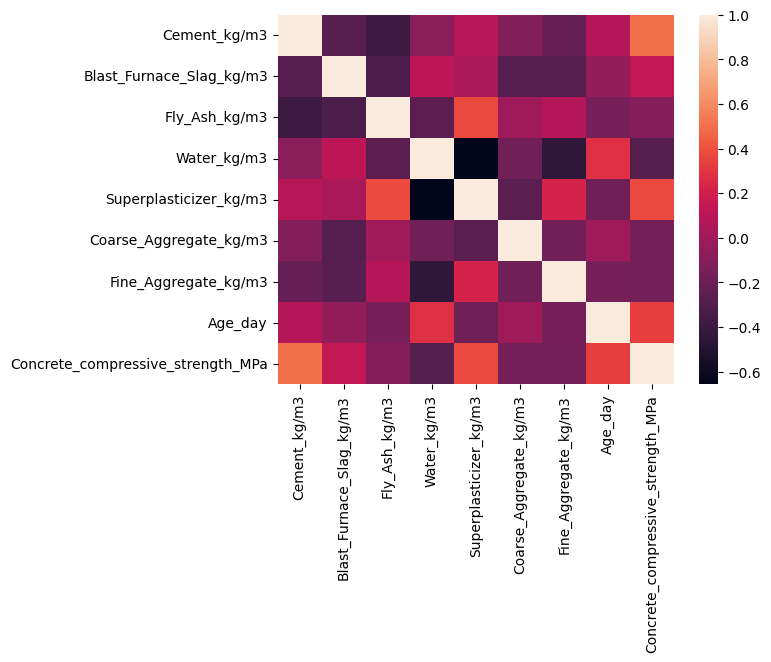

In [142]:
sns.heatmap(df.corr())

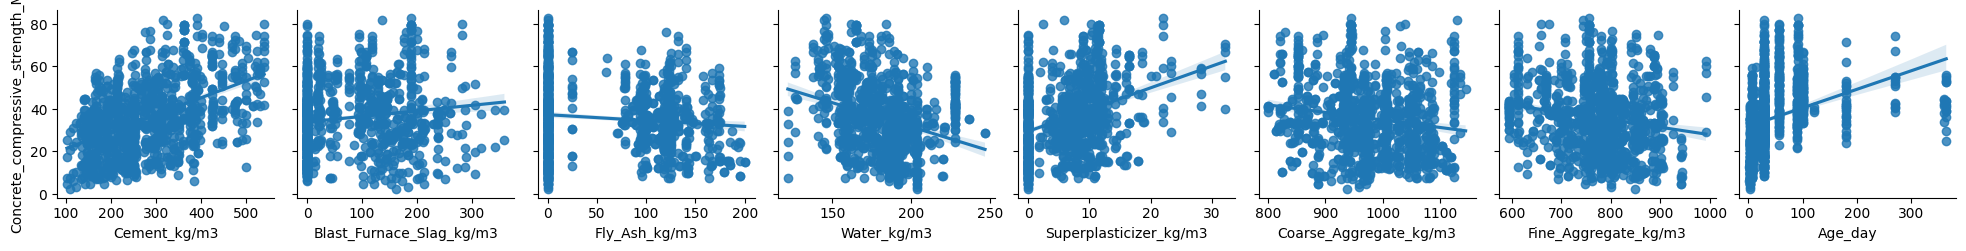

In [143]:
x_vars = df.columns[:-1]  # Select all columns except the last one
y_var = df.columns[-1]  # Select the last column

sns.pairplot(df,x_vars=x_vars,y_vars=y_var,kind='reg')

In [144]:
msk=np.random.rand(len(df))<0.8
train=df[msk]
test=df[~msk]

Multi Linear Regression

In [149]:
regr1=linear_model.LinearRegression()
X_train=np.asanyarray(train[["Cement_kg/m3","Blast_Furnace_Slag_kg/m3","Fly_Ash_kg/m3","Water_kg/m3","Superplasticizer_kg/m3","Coarse_Aggregate_kg/m3","Fine_Aggregate_kg/m3","Age_day"]])
y_train=np.asanyarray(train["Concrete_compressive_strength_MPa"])
X_test=np.asanyarray(test[["Cement_kg/m3","Blast_Furnace_Slag_kg/m3","Fly_Ash_kg/m3","Water_kg/m3","Superplasticizer_kg/m3","Coarse_Aggregate_kg/m3","Fine_Aggregate_kg/m3","Age_day"]])
y_test=np.asanyarray(test["Concrete_compressive_strength_MPa"])

regr1.fit(X_train,y_train)
regr1.score(X_test,y_test)


0.562692579352539

Multi Linear Regression after removing 3 of the less related features

In [151]:
regr2=linear_model.LinearRegression()
X_train=np.asanyarray(train[["Cement_kg/m3","Blast_Furnace_Slag_kg/m3","Fly_Ash_kg/m3","Superplasticizer_kg/m3","Age_day"]])
y_train=np.asanyarray(train["Concrete_compressive_strength_MPa"])
X_test=np.asanyarray(test[["Cement_kg/m3","Blast_Furnace_Slag_kg/m3","Fly_Ash_kg/m3","Superplasticizer_kg/m3","Age_day"]])
y_test=np.asanyarray(test["Concrete_compressive_strength_MPa"])

regr2.fit(X_train,y_train)
regr2.score(X_test,y_test)

0.5399886760597834

Data Normalization

In [161]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge

# Create a MinMaxScaler object
min_max_scaler = MinMaxScaler()

# Normalize the training data
X_train_normalized = min_max_scaler.fit_transform(X_train)

# Normalize the test data
X_test_normalized = min_max_scaler.transform(X_test)

# Apply Ridge regression
alpha = 0.1  # Regularization parameter (adjust as needed)
ridge = Ridge(alpha=alpha)




Regularization with Ridge regression "L2"

In [162]:
regr3=linear_model.LinearRegression()
X_train_normalized=np.asanyarray(train[["Cement_kg/m3","Blast_Furnace_Slag_kg/m3","Fly_Ash_kg/m3","Water_kg/m3","Superplasticizer_kg/m3","Coarse_Aggregate_kg/m3","Fine_Aggregate_kg/m3","Age_day"]])
y_train=np.asanyarray(train["Concrete_compressive_strength_MPa"])
X_test_normalized=np.asanyarray(test[["Cement_kg/m3","Blast_Furnace_Slag_kg/m3","Fly_Ash_kg/m3","Water_kg/m3","Superplasticizer_kg/m3","Coarse_Aggregate_kg/m3","Fine_Aggregate_kg/m3","Age_day"]])
y_test=np.asanyarray(test["Concrete_compressive_strength_MPa"])

ridge.fit(X_train_normalized,y_train)
ridge.score(X_test_normalized,y_test)


0.5626925377767986

Polynomial regression model:

The make_pipeline function is used to create a pipeline that applies the polynomial feature transformation followed by the linear regression model. 

This allows you to treat the entire pipeline as a single estimator and simplifies the training and evaluation process.

In [183]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

degree = 3  # Degree of polynomial features

poly_features = PolynomialFeatures(degree=degree) #Create the polynomial features transformer

regr4 = LinearRegression()

regr_poly_pipeline = make_pipeline(poly_features, regr4) #Create the polynomial regression pipeline

regr_poly_pipeline.fit(X_train_normalized, y_train)

# Evaluate the polynomial regression model
score = regr_poly_pipeline.score(X_test_normalized, y_test)
print("Polynomial Regression Score:", score)

Polynomial Regression Score: 0.8587727139658661


In [184]:
df_normalized = pd.DataFrame(X_train_normalized, columns=["Cement_kg/m3","Blast_Furnace_Slag_kg/m3","Fly_Ash_kg/m3","Water_kg/m3","Superplasticizer_kg/m3","Coarse_Aggregate_kg/m3","Fine_Aggregate_kg/m3","Age_day"]) # Create a DataFrame using the normalized feature matrix and column names

df_normalized.head(15)


,Cement_kg/m3,Blast_Furnace_Slag_kg/m3,Fly_Ash_kg/m3,Water_kg/m3,Superplasticizer_kg/m3,Coarse_Aggregate_kg/m3,Fine_Aggregate_kg/m3,Age_day
0,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0
1,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0
3,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0
4,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90.0
5,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365.0
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28.0
7,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28.0
8,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28.0
9,427.5,47.5,0.0,228.0,0.0,932.0,594.0,270.0


In [185]:
y_pred = regr_poly_pipeline.predict(X_test_normalized)


[60.45473473 28.29114638 38.3663691  30.36889062 48.52004902 60.61950953
 36.25889385 57.98067535 50.4357327  31.25242094 52.34020654 24.52992844
 45.68316885 49.91430663 38.41815209 49.19337683 44.84164781 40.88027325
 46.97229329 48.57736531 62.63409459 51.59266068 69.95925902 69.03953985
 67.75066133 61.45290523 67.75066133 75.1684484  73.08326201 76.27713282
 73.08326201 74.92428319 65.20755756 75.69659193 76.42880469 70.78664126
 18.81128296 29.67727761 18.85040024 26.25938969 35.65685625 18.51380321
  9.71833206 28.14191013 15.29225924 33.14769709 45.99229521 11.06063012
 16.72830107 38.41825333 25.3310603  43.52016477 44.16346379 35.52696555
 45.39731306 42.51651428 44.25996604 40.51916037 31.18227245 44.82261444
 23.9901708  53.16627727 51.67587936 18.81746341 48.84480892 41.74372695
 38.97371548 54.24952806 26.02883052 54.2846809  66.67832085 39.8378455
 41.77535783 30.36115733 12.24553317 36.8154281  61.15094323 71.66605555
 18.16959557  6.87432274 16.32841344 20.5682499  26.

In [192]:
test_values=[[530,50,0,162,2.5,951,676,50]]
regr_poly_pipeline.predict(test_values)

array([62.65583737])